In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# 꽃잎 샘플 데이터 로드
iris = load_iris()

X = iris.data[:, 2:] #꽃잎의 길이와 너비
y = iris.target
feature_names = iris.feature_names[2:]

In [3]:
#의사 결정 분류기
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X, y)

In [4]:
from sklearn.metrics import accuracy_score

y_pred_tr1 = tree1.predict(X)
print("정확도: %.2f" %(accuracy_score(y, y_pred_tr1)*100), "%")

정확도: 97.33 %


In [5]:
from sklearn.tree import export_graphviz
import pydot

def draw_decision_tree(model, filename):
    export_graphviz(model, out_file=filename+".dot",
                    feature_names=feature_names, class_names=iris.target_names,
                    impurity=False, filled=True)
    (graph,) = pydot.graph_from_dot_file(filename+".dot", encoding='utf8')
    graph.write_png(filename+".png")

In [6]:
draw_decision_tree(tree1, "Iris_tree1")

In [7]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

def draw_decision_boundary(X, y, model, title):
    resolution = 0.01
    markers = ('o', 's', '^')
    colors = ('lightgreen', 'red', 'blue')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    mpd = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, mpd, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, mpd, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
        
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return mpd

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

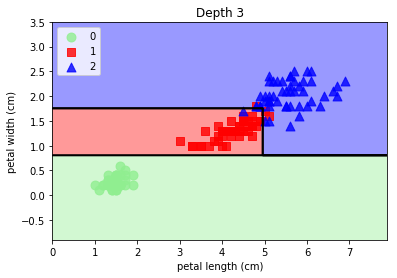

In [8]:
draw_decision_boundary(X, y, tree1, "Depth 3")

In [9]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X, y)

In [10]:
y_pred_tr2 = tree2.predict(X)
print("정확도: %.2f" %(accuracy_score(y, y_pred_tr2)*100), "%")

정확도: 98.67 %


In [11]:
draw_decision_tree(tree2, "Iris_tree2")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

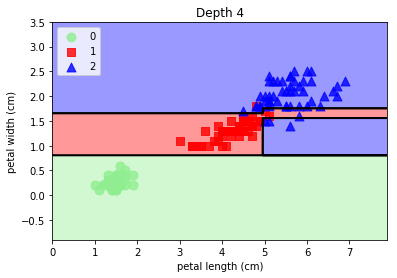

In [12]:
draw_decision_boundary(X, y, tree2, "Depth 4")